<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Retorno_di%C3%A1rio_e_acumulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# 1. Construção da carteira

In [ ]:
# Período
inicio = '2018-01-01'
fim = '2020-12-30'

# Seleção dos ativos da carteira
ativos = ['PETR4.SA','VALE3.SA', 'BBDC4.SA','ITSA4.SA', 'ABEV3.SA' ,'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA', 'BBAS3.SA' ]

In [ ]:
pesos = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [ ]:
carteira = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [ ]:
carteira.head()

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-02,18.143393,23.474609,15.054405,9.444439,6.252338,6.091882,3.955141,34.739544,28.455338,8.858921
2018-01-03,18.185215,23.774015,15.123614,9.486981,6.326028,6.147096,4.019122,34.396526,28.284828,8.724376
2018-01-04,18.084841,24.002123,15.371749,9.564977,6.445065,6.158139,3.926060,34.798222,28.400772,8.639397
2018-01-05,18.151760,24.002123,15.458821,9.713875,6.456403,6.194946,4.019122,34.870434,28.844112,8.674803
2018-01-08,18.118299,24.059153,15.454460,9.763508,6.450733,6.268566,4.019122,35.114151,29.485245,8.745621


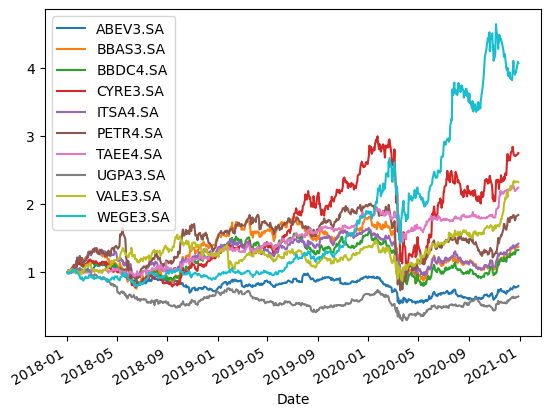

In [ ]:
(carteira/carteira.iloc[0]).plot();

# 2. Retorno diário e o retorno acumulado

In [ ]:
retornos = carteira.pct_change()

Retorno diário da carteira

In [ ]:
retorno_carteira = (retornos*pesos).sum(axis = 1)

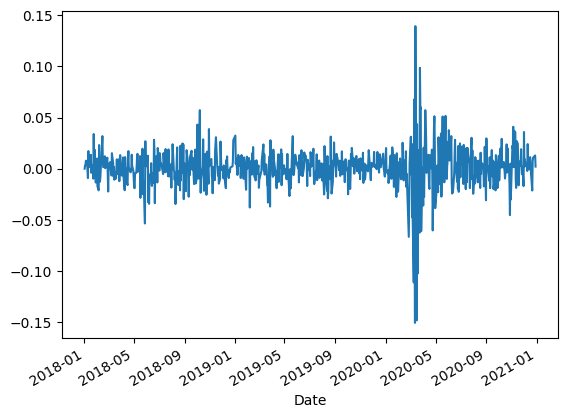

In [ ]:
retorno_carteira.plot();

Retorno acumulado

In [ ]:
retorno_acumulado_carteira = (1 + retorno_carteira).cumprod() - 1

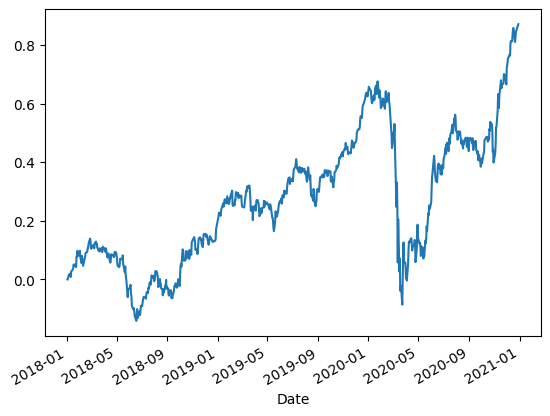

In [ ]:
retorno_acumulado_carteira.plot();

# 3. Comparativo de desempenho

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']
ibov_retorno = ibov.pct_change()
retorno_acumulado_ibov = (1 + ibov_retorno).cumprod() - 1

[*********************100%***********************]  1 of 1 completed


In [ ]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retorno_Carteira'] = retorno_acumulado_carteira
retorno_portfolio['IBOV'] = retorno_acumulado_ibov
retorno_portfolio = retorno_portfolio.dropna()

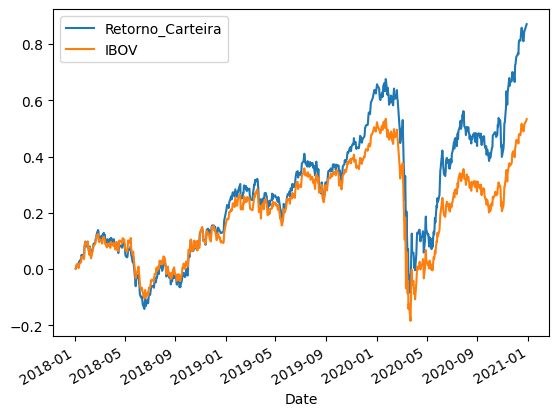

In [ ]:
retorno_portfolio.plot();